<div class="alert alert-block alert-success"><font color="black"><h1><left>Loan Analysis using Different Classification Methods</left></h1><br><br>
<font size="4">https://vitalflux.com/cart-decision-tree-python-example/&emsp;&emsp;&emsp;</font></div>

<div class="alert alert-block alert-success"><font color="black"><h1><left>EDA</font></div>

In [1]:
# Load libraries and read dataset
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets 
# set.seed(123)

path = "E:/Education/DataScience/Review/Data/"
train_file = path + "loans_proj2_training"
test_file = path + "loans_proj2_test"
loans_train = pd.read_csv(train_file)
loans_train['Default'] = loans_train.Default.astype('category') 
print(loans_train[1:5])
loans_test = pd.read_csv(test_file)
loans_test['Default'] = loans_test.Default.astype('category') 
print(loans_test[1:5])

   loan_amnt  term  int_rate  installment Default
1       6000    36      7.39       186.34       0
2       5700    36     11.99       189.30       1
3      20000    60     13.67       461.96       1
4      13000    36     12.99       437.96       0
   loan_amnt  term  int_rate  installment Default
1      11275    36     15.31       392.57       0
2      10000    36      9.16       318.75       0
3       5700    36     11.99       189.30       1
4      30000    60     11.99       667.19       0


<div class="alert alert-block alert-success"><font color="black"><h1><left>Calculate Interest Amount </font></h1></left><br><font-size=4>
    - Calc and add to dataframe <br>
    - Display to show it exists <br>
    - Calculate mean loan amt (14,514) and mean interest amt (4,392) <br>
    </font></div>

In [2]:
def calc_interest(row):
    temp_amt = row['installment'] * row['term'] - row['loan_amnt']
    return temp_amt

loans_train['interest_amnt'] = loans_train.apply(lambda row: calc_interest(row),axis=1)

In [3]:
print(loans_train[1:5])
loans_train.describe()      

   loan_amnt  term  int_rate  installment Default  interest_amnt
1       6000    36      7.39       186.34       0         708.24
2       5700    36     11.99       189.30       1        1114.80
3      20000    60     13.67       461.96       1        7717.60
4      13000    36     12.99       437.96       0        2766.56


,loan_amnt,term,int_rate,installment,interest_amnt
count,87620.000000,87620.000000,87620.000000,87620.000000,87620.000000
mean,14513.597352,41.459849,13.457036,447.038748,4391.655833
std,8926.980470,10.061192,5.156547,276.354677,4743.793389
min,1000.000000,36.000000,5.320000,30.120000,84.320000
25%,7500.000000,36.000000,9.750000,245.160000,1329.240000
50%,12000.000000,36.000000,12.790000,375.990000,2559.040000
75%,20000.000000,36.000000,16.290000,597.780000,5723.040000
max,40000.000000,60.000000,30.990000,1584.900000,37634.000000


<div class="alert alert-block alert-success"><font color="black"><h1><left>Examine Data Relationships</font></div>

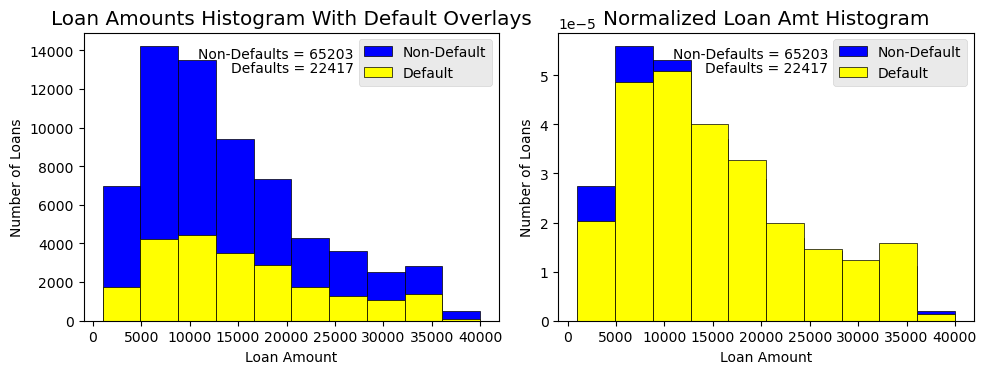

In [6]:
import matplotlib.pyplot as plt

temp_a = loans_train.loc[(loans_train.Default == 0),'loan_amnt']
atext = 'Non-Defaults = ' + str(len(temp_a))
temp_b = loans_train.loc[(loans_train.Default == 1),'loan_amnt']
btext = 'Defaults = ' + str(len(temp_b))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plt.subplots_adjust(hspace=0.5)
plt.style.use('ggplot')
ax[0].set_title('Loan Amounts Histogram With Default Overlays')
ax[0].hist(temp_a, edgecolor='black',color='blue',bins=10,label='Non-Default')
ax[0].hist(temp_b, edgecolor='black',color='Yellow',bins=10,label='Default')
ax[0].legend(loc='upper right')
ax[0].text(0.65, 0.95, atext, horizontalalignment='right', verticalalignment='top',transform = ax[0].transAxes)
ax[0].text(0.65, 0.90, btext, horizontalalignment='right', verticalalignment='top',transform = ax[0].transAxes)
ax[0].set_xlabel('Loan Amount')
ax[0].set_ylabel('Number of Loans')
ax[1].set_title('Normalized Loan Amt Histogram')
ax[1].hist(temp_a, edgecolor='black',color='blue',bins=10,label='Non-Default',density=True)
ax[1].hist(temp_b, edgecolor='black',color='Yellow',bins=10,label='Default',density=True)
ax[1].legend(loc='upper right')
ax[1].text(0.65, 0.95, atext, horizontalalignment='right', verticalalignment='top',transform = ax[1].transAxes)
ax[1].text(0.65, 0.90, btext, horizontalalignment='right', verticalalignment='top',transform = ax[1].transAxes)
ax[1].set_xlabel('Loan Amount')
ax[1].set_ylabel('Number of Loans')

f.tight_layout() 
plt.show()

[Text(0, 1, 'Non-Default'), Text(0, 2, 'Default')]

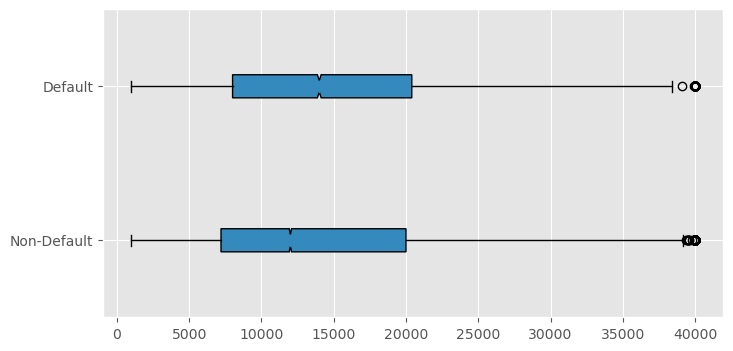

In [8]:
fig = plt.figure(figsize =(8, 4))
ax = fig.add_subplot(111)
 
def get_data(code):
    temp_x = loans_train.loc[(loans_train.Default == code),'loan_amnt']
    return temp_x

x_data = []
x_description = ['Non-Default', 'Default']
x_items = 0

#for code, description in icd_codes_t.items():
for code in [0,1]:
    x_data.append(get_data(code))
    

# Creating axes instance
bp = ax.boxplot(x_data, patch_artist = True,
                notch ='True', vert = 0)

ax.set_yticklabels(x_description)



In [13]:
# Kruskal-wallace shows that the means for the loan amounts from defaulters and non-defaulters 
# are not from the same distribution (P = 0.0).
from scipy.stats.mstats import kruskal
kruskal(loans_train['loan_amnt'].values, loans_train['Default'].values)

KruskalResult(statistic=138894.38450728, pvalue=0.0)

In [9]:
loans_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87620 entries, 0 to 87619
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   loan_amnt      87620 non-null  int64   
 1   term           87620 non-null  int64   
 2   int_rate       87620 non-null  float64 
 3   installment    87620 non-null  float64 
 4   Default        87620 non-null  category
 5   interest_amnt  87620 non-null  float64 
dtypes: category(1), float64(3), int64(2)
memory usage: 3.4 MB


In [10]:
loans_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87805 entries, 0 to 87804
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   loan_amnt    87805 non-null  int64   
 1   term         87805 non-null  int64   
 2   int_rate     87805 non-null  float64 
 3   installment  87805 non-null  float64 
 4   Default      87805 non-null  category
dtypes: category(1), float64(2), int64(2)
memory usage: 2.8 MB


<div class="alert alert-block alert-success"><font color="black"><h1><left>Loan Term and Defaults</font></div>

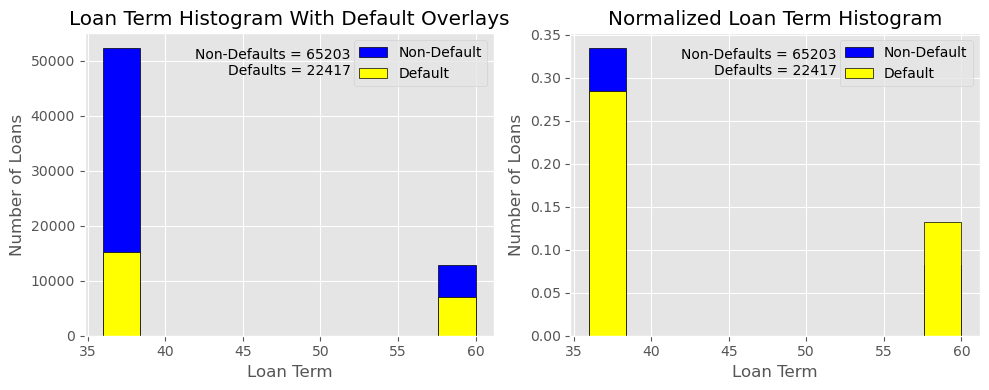

In [16]:
import matplotlib.pyplot as plt

temp_a = loans_train.loc[(loans_train.Default == 0),'term']
atext = 'Non-Defaults = ' + str(len(temp_a))
temp_b = loans_train.loc[(loans_train.Default == 1),'term']
btext = 'Defaults = ' + str(len(temp_b))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plt.subplots_adjust(hspace=0.5)
plt.style.use('ggplot')
ax[0].set_title('Loan Term Histogram With Default Overlays')
ax[0].hist(temp_a, edgecolor='black',color='blue',bins=10,label='Non-Default')
ax[0].hist(temp_b, edgecolor='black',color='Yellow',bins=10,label='Default')
ax[0].legend(loc='upper right')
ax[0].text(0.65, 0.95, atext, horizontalalignment='right', verticalalignment='top',transform = ax[0].transAxes)
ax[0].text(0.65, 0.90, btext, horizontalalignment='right', verticalalignment='top',transform = ax[0].transAxes)
ax[0].set_xlabel('Loan Term')
ax[0].set_ylabel('Number of Loans')
ax[1].set_title('Normalized Loan Term Histogram')
ax[1].hist(temp_a, edgecolor='black',color='blue',bins=10,label='Non-Default',density=True)
ax[1].hist(temp_b, edgecolor='black',color='Yellow',bins=10,label='Default',density=True)
ax[1].legend(loc='upper right')
ax[1].text(0.65, 0.95, atext, horizontalalignment='right', verticalalignment='top',transform = ax[1].transAxes)
ax[1].text(0.65, 0.90, btext, horizontalalignment='right', verticalalignment='top',transform = ax[1].transAxes)
ax[1].set_xlabel('Loan Term')
ax[1].set_ylabel('Number of Loans')

f.tight_layout() 
plt.show()

In [17]:
loans_train.groupby('term')['term'].count()

term
36    67687
60    19933
Name: term, dtype: int64

In [84]:
data_table = pd.crosstab(loans_train.Default, loans_train.term,margins=True)
print (data_table)

term        36     60    All
Default                     
0        52375  12828  65203
1        15312   7105  22417
All      67687  19933  87620


<div class="alert alert-block alert-success"><font color="black"><h1><left>Interest Rate and Defaults</font></div>

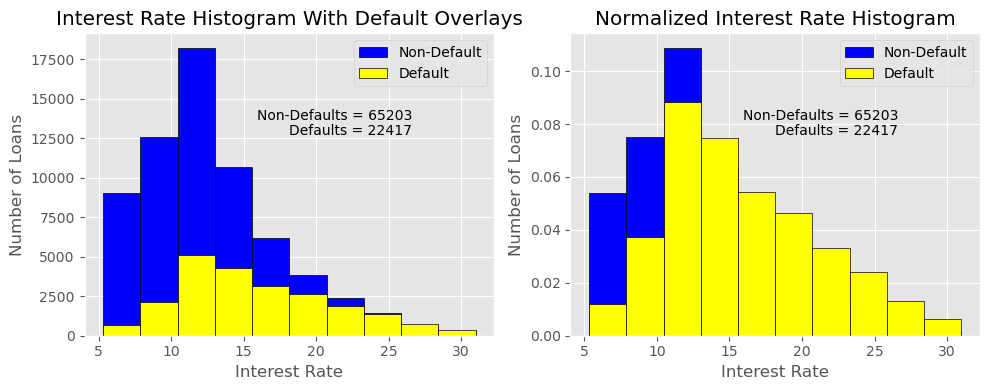

In [94]:
import matplotlib.pyplot as plt

temp_a = loans_train.loc[(loans_train.Default == 0),'int_rate']
atext = 'Non-Defaults = ' + str(len(temp_a))
temp_b = loans_train.loc[(loans_train.Default == 1),'int_rate']
btext = 'Defaults = ' + str(len(temp_b))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plt.subplots_adjust(hspace=0.5)
plt.style.use('ggplot')
ax[0].set_title('Interest Rate Histogram With Default Overlays')
ax[0].hist(temp_a, edgecolor='black',color='blue',bins=10,label='Non-Default')
ax[0].hist(temp_b, edgecolor='black',color='Yellow',bins=10,label='Default')
ax[0].legend(loc='upper right')
ax[0].text(0.80, 0.75, atext, horizontalalignment='right', verticalalignment='top',transform = ax[0].transAxes)
ax[0].text(0.80, 0.70, btext, horizontalalignment='right', verticalalignment='top',transform = ax[0].transAxes)
ax[0].set_xlabel('Interest Rate')
ax[0].set_ylabel('Number of Loans')
ax[1].set_title('Normalized Interest Rate Histogram')
ax[1].hist(temp_a, edgecolor='black',color='blue',bins=10,label='Non-Default',density=True)
ax[1].hist(temp_b, edgecolor='black',color='Yellow',bins=10,label='Default',density=True)
ax[1].legend(loc='upper right')
ax[1].text(0.80, 0.75, atext, horizontalalignment='right', verticalalignment='top',transform = ax[1].transAxes)
ax[1].text(0.80, 0.70, btext, horizontalalignment='right', verticalalignment='top',transform = ax[1].transAxes)
ax[1].set_xlabel('Interest Rate')
ax[1].set_ylabel('Number of Loans')

f.tight_layout() 
plt.show()

KruskalResult(statistic=138882.63456009535, pvalue=0.0)

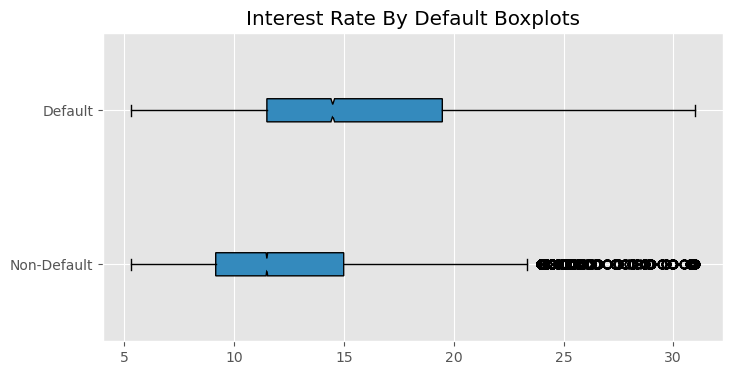

In [95]:
fig = plt.figure(figsize =(8, 4))
ax = fig.add_subplot(111)
 
def get_data(code):
    temp_x = loans_train.loc[(loans_train.Default == code),'int_rate']
    return temp_x

x_data = []
x_description = ['Non-Default', 'Default']
x_items = 0

#for code, description in icd_codes_t.items():
for code in [0,1]:
    x_data.append(get_data(code))
    

# Creating axes instance
bp = ax.boxplot(x_data, patch_artist = True,
                notch ='True', vert = 0)

ax.set_yticklabels(x_description)
ax.set_title('Interest Rate By Default Boxplots')
# Kruskal-wallace shows that the means for the loan amounts from defaulters and non-defaulters 
# are not from the same distribution (P = 0.0).
from scipy.stats.mstats import kruskal
kruskal(loans_train['int_rate'].values, loans_train['Default'].values)


<div class="alert alert-block alert-success"><font color="black"><h1><left>Loan Installment and Defaults</font></div>

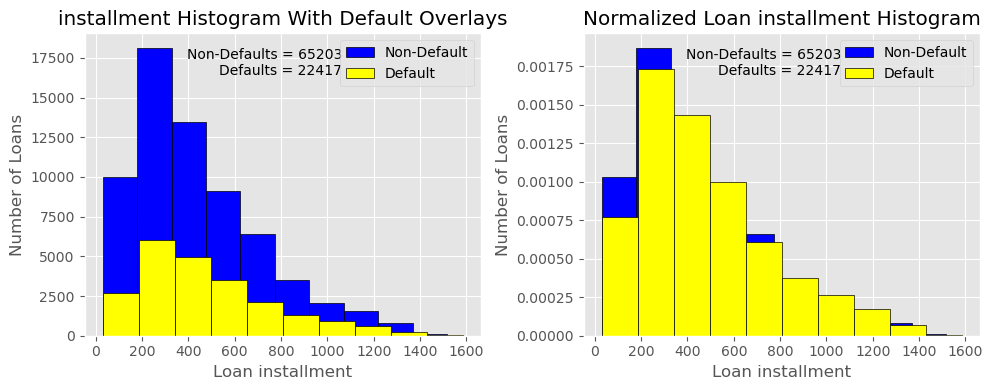

In [38]:
import matplotlib.pyplot as plt

temp_a = loans_train.loc[(loans_train.Default == 0),'installment']
atext = 'Non-Defaults = ' + str(len(temp_a))
temp_b = loans_train.loc[(loans_train.Default == 1),'installment']
btext = 'Defaults = ' + str(len(temp_b))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plt.subplots_adjust(hspace=0.5)
plt.style.use('ggplot')
ax[0].set_title('installment Histogram With Default Overlays')
ax[0].hist(temp_a, edgecolor='black',color='blue',bins=10,label='Non-Default')
ax[0].hist(temp_b, edgecolor='black',color='Yellow',bins=10,label='Default')
ax[0].legend(loc='upper right')
ax[0].text(0.65, 0.95, atext, horizontalalignment='right', verticalalignment='top',transform = ax[0].transAxes)
ax[0].text(0.65, 0.90, btext, horizontalalignment='right', verticalalignment='top',transform = ax[0].transAxes)
ax[0].set_xlabel('Loan installment')
ax[0].set_ylabel('Number of Loans')
ax[1].set_title('Normalized Loan installment Histogram')
ax[1].hist(temp_a, edgecolor='black',color='blue',bins=10,label='Non-Default',density=True)
ax[1].hist(temp_b, edgecolor='black',color='Yellow',bins=10,label='Default',density=True)
ax[1].legend(loc='upper right')
ax[1].text(0.65, 0.95, atext, horizontalalignment='right', verticalalignment='top',transform = ax[1].transAxes)
ax[1].text(0.65, 0.90, btext, horizontalalignment='right', verticalalignment='top',transform = ax[1].transAxes)
ax[1].set_xlabel('Loan installment')
ax[1].set_ylabel('Number of Loans')

f.tight_layout() 
plt.show()

KruskalResult(statistic=138873.52932443772, pvalue=0.0)

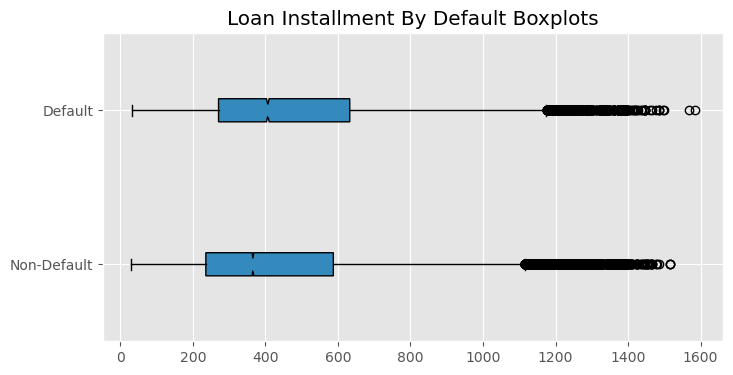

In [47]:
fig = plt.figure(figsize =(8, 4))
ax = fig.add_subplot(111)
 
def get_data(code):
    temp_x = loans_train.loc[(loans_train.Default == code),'installment']
    return temp_x

x_data = []
x_description = ['Non-Default', 'Default']
x_items = 0

#for code, description in icd_codes_t.items():
for code in [0,1]:
    x_data.append(get_data(code))
    

# Creating axes instance
bp = ax.boxplot(x_data, patch_artist = True,
                notch ='True', vert = 0)

ax.set_yticklabels(x_description)
ax.set_title('Loan Installment By Default Boxplots')
# Kruskal-wallace shows that the means for the loan amounts from defaulters and non-defaulters 
# are not from the same distribution (P = 0.0).
from scipy.stats.mstats import kruskal
kruskal(loans_train['installment'].values, loans_train['Default'].values)


<div class="alert alert-block alert-success"><font color="black"><h1><left>Correlation between Covariates <br>
    </left></h1>
<font size="4">- There is a consistent positive correlation between all covariates and instterets amount. This makes sense, i.e., longer loan term, larger interest owed. <br>
    - There is also a very high correaltion between loan amount and installment payment, which was not as expected.</font></div>

C:\Users\rolan\AppData\Local\Temp\ipykernel_2060\3637048290.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrm = loans_train.corr()


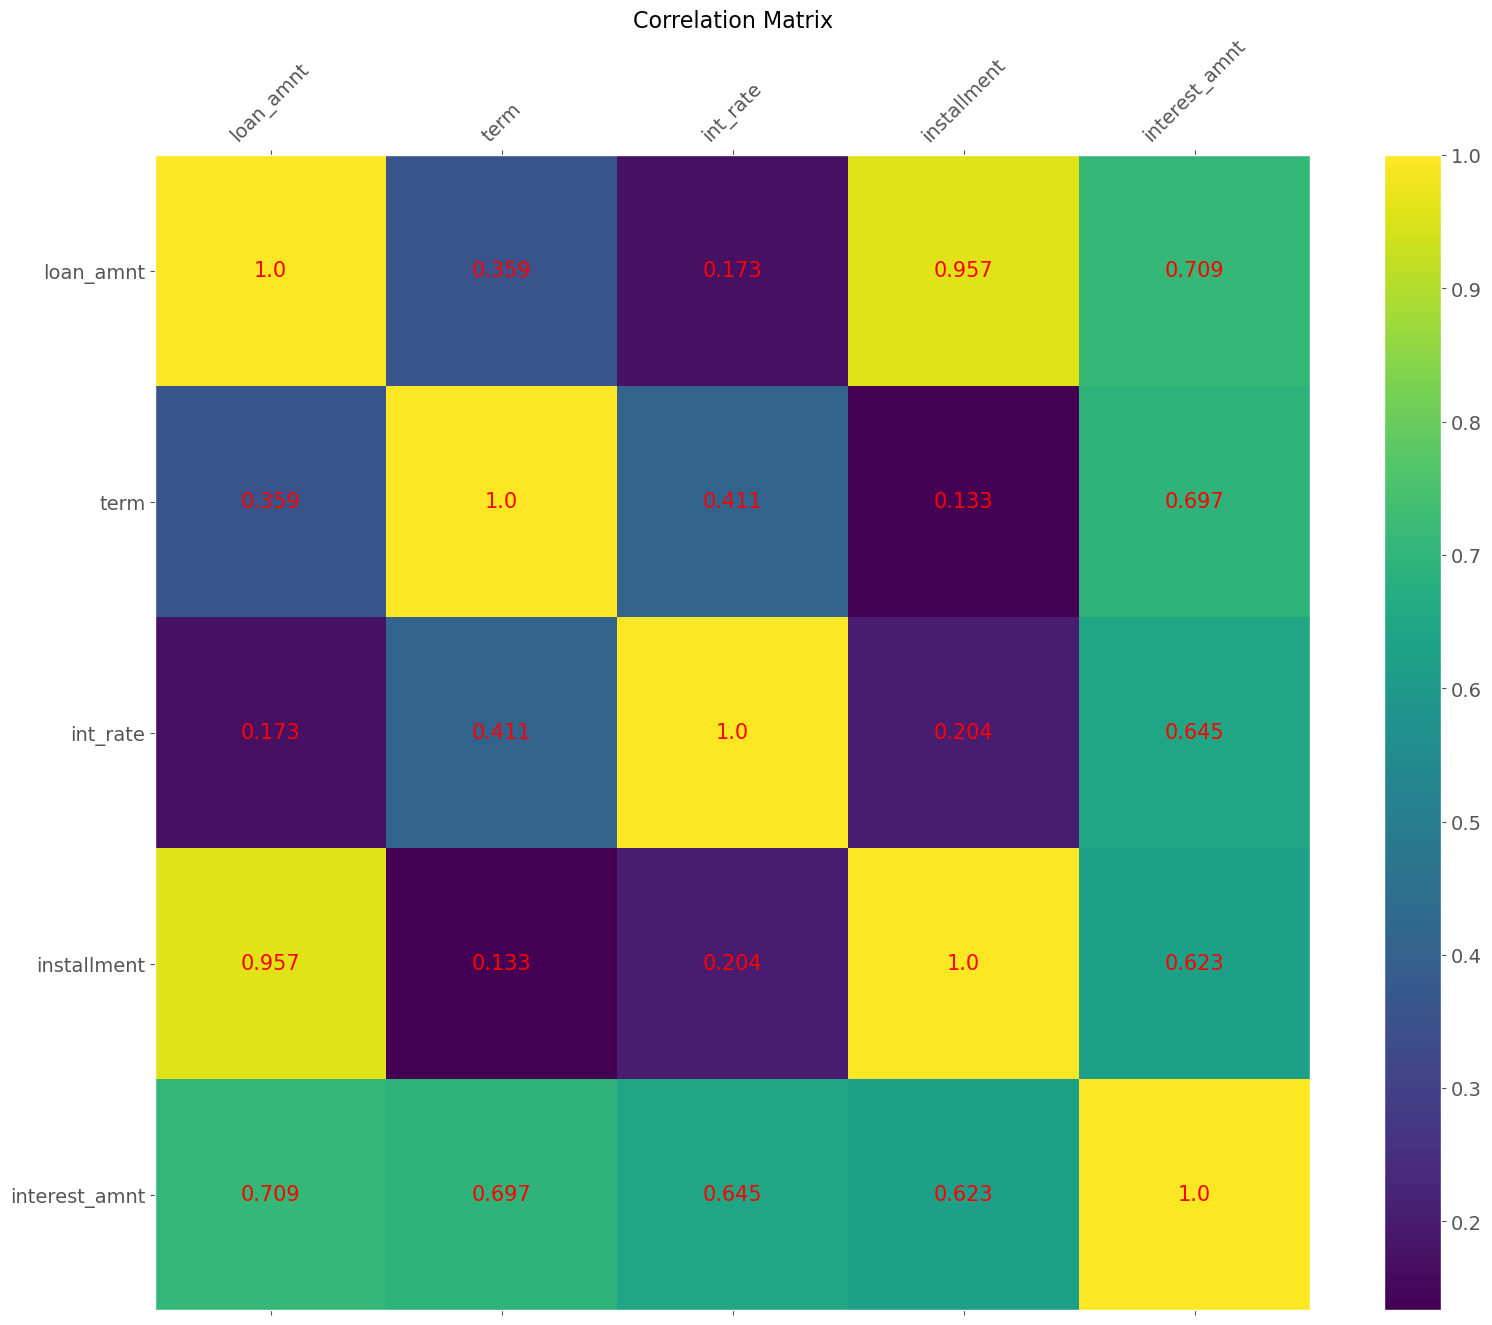

In [83]:
# Do heatmap of correlations, Also grid(none) gets rid of white gridlines
corrm = loans_train.corr()
fig, ax = plt.subplots(figsize=(19, 15))
im1 = ax.matshow(corrm)
cb = fig.colorbar(im1, ax=ax)
plt.grid(None)
plt.xticks(range(loans_train.select_dtypes(['number']).shape[1]), loans_train.select_dtypes(['number']).columns, 
           fontsize=14, rotation=45)
plt.yticks(range(loans_train.select_dtypes(['number']).shape[1]), loans_train.select_dtypes(['number']).columns, fontsize=14)
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
for i in range(5):
   for j in range(5):
      c = round(corrm.iloc[j, i],3)
      ax.text(i, j, str(c), va='center', ha='center', fontsize=15, color='red')

<div class="alert alert-block alert-success"><font color="black"><h1><left>
Use Chi_Square Test to Determine Independnence</font><br><font size=4>
- H0 Fails There is a relationship Between Installment (Loan Length) and the Loan Defaulting</font></div>


In [88]:
from scipy.stats import chi2_contingency
 
# defining the table
stat, p, dof, expected = chi2_contingency(data_table)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 9.847149208043565e-296
Dependent (reject H0)
